In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input,Dense,Flatten,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout, Conv1D,Lambda
from keras.models import Model
import pandas as pd
import keras.backend as K
import h5py
import model_architectures as ma
import utils

In [4]:
models_dir = 'models/base_scrnn/'
feat_file='../project_features/base_scrnn_features.h5'
fid=h5py.File(feat_file,'r');
x_tr=fid['x_tr']
y_tr=fid['y_tr']
snr_tr = np.array(fid['snr_tr'])
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [15]:
m1 = ma.base_scrnn()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 2)            0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 2)            8         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 124, 128)          1408      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 41, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 37, 128)           82048     
_________________________________________________________________
lstm_5 (LSTM)                (None, 37, 128)           131584    
_________________________________________________________________
lstm_6 (LSTM)                (None, 37, 128)           1315

In [17]:
checkpoint = keras.callbacks.ModelCheckpoint(models_dir+ "model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [18]:
m1.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=128,
       epochs=10,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=2)

Train on 198000 samples, validate on 22000 samples
Epoch 1/10
 - 683s - loss: 1.1971 - accuracy: 0.5399 - val_loss: 1.1474 - val_accuracy: 0.5611

Epoch 00001: saving model to models/base_scrnn/model_epoch-01_val_acc-0.56.h5
Epoch 2/10
 - 749s - loss: 1.1491 - accuracy: 0.5600 - val_loss: 1.1419 - val_accuracy: 0.5669

Epoch 00002: saving model to models/base_scrnn/model_epoch-02_val_acc-0.57.h5
Epoch 3/10


KeyboardInterrupt: 

W0511 03:10:23.400074 139638369601344 deprecation.py:506] From /home/jeel/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0511 03:10:23.511536 139638369601344 module_wrapper.py:139] From /home/jeel/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0511 03:10:30.031812 139638369601344 module_wrapper.py:139] From /home/jeel/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.




SNR: -20dB, Validation Accuracy: 9.181818181818182


             Classification Report
              precision    recall  f1-score   support

           0       0.07      0.01      0.02       100
           1       0.00      0.00      0.00       100
           2       0.06      0.01      0.02       100
           3       0.00      0.00      0.00       100
           4       0.14      0.01      0.02       100
           5       0.00      0.00      0.00       100
           6       0.09      0.98      0.17       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100

   micro avg       0.09      0.09      0.09      1100
   macro avg       0.03      0.09      0.02      1100
weighted avg       0.03      0.09      0.02      1100


             Confusion Matrix
[[ 1  1  1  0  0  0 96  0  1  0  0]
 [ 1  0  4  0  0  0 94  0  1  0

/home/jeel/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 98   0   1   0   0   0   1   0   0   0   0]
 [  0  99   0   0   0   0   0   0   0   0   1]
 [  0   0  99   0   0   0   1   0   0   0   0]
 [  0   0   0  86   0   0   0   0   0  14   0]
 [  0   0   0   0  96   0   0   0   0   4   0]
 [  0   0   0   0   0  55   0   1  44   0   0]
 [  2   0   0   0   1   0  97   0   0   0   0]
 [  0   4   0   0   0   1   1  93   1   0   0]
 [  0   0   0   0   0  29   0   4  67   0   0]
 [  0   0   0  64   1   0   0   0   0  35   0]
 [  0   0   0   0   0   0   0   0   0   0 100]]

SNR: 4dB, Validation Accuracy: 83.36363636363636


             Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.98      0.98      0.98       100
           2       0.99      0.99      0.99       100
           3       0.59      0.89      0.71       100
           4       0.99      0.97      0.98       100
           5       0.55      0.47      0.51       100
           6    

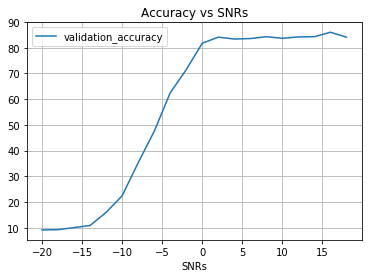

In [5]:
utils.evaluate_model(models_dir,'model_epoch-02_val_acc-0.57.h5',np.array(x_ts),np.array(y_ts),snr_ts)